In [1]:
import numpy as np
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FuncFormatter
import scipy.stats as stats
from scipy.stats import skewnorm as sn
import scipy.special as sp
import seaborn as sns
from seaborn import kdeplot
from sklearn.neighbors import KernelDensity
plt.rc('font', size=12.0)

In [2]:
m_em = ['Mns_6304', 'Mns_6397',  'Mns_M13',   'Mns_M28',  'Mns_M30',  'Mns_wCen',
         'Mns_X7',   'Mns_1810b', 'Mns_1724b', 'Mns_1702', 'Mns_0030', 'Mns_0740']
r_em = ['Rns_6304', 'Rns_6397',  'Rns_M13',   'Rns_M28',  'Rns_M30',  'Rns_wCen',
         'Rns_X7',   'Rns_1810b', 'Rns_1724b', 'Rns_1702', 'Rns_0030', 'Rns_0740']
m_gw = ['m1_gw17', 'm2_gw17', 'm1_gw19', 'm2_gw19']
m_pop = ['M_J0453p', 'M_J0453c', 'M_J1906p', 'M_J1906c', 'M_B1534p', 'M_B1534c',
        'M_B1913p', 'M_B1913c', 'M_B2127p', 'M_B2127c', 'M_J0737A', 'M_J0737B',
        'M_J1756p', 'M_J1756c', 'M_J1807p', 'M_J1807c', 'M_J1518p', 'M_J1518c',
        'M_J1811p', 'M_J1811c', 'M_J1829p', 'M_J1829c', 'M_J2045',  'M_J2053',
        'M_J1713',  'M_B1855',  'M_J0751',  'M_J1141',  'M_J1738',  'M_J1614',
        'M_J0348',  'M_J2222',  'M_J2234',  'M_J1949',  'M_J1012',  'M_J0437',
        'M_J1909',  'M_J1802',  'M_J1911',  'M_J2043',  'M_J0337',  'M_J1946',
        'M_J1918',  'M_J1600',  'M_J0621',  'M_B2303',  'M_J0024',  'M_J0514',
        'M_B1516',  'M_J1748I', 'M_J1748J', 'M_B1802',  'M_B1911',  'M_J0740',
        'M_CygX2',  'M_XTEJ2123',           'M_4U1822', 'M_HerX1',  'M_2S0921']

model = ['ml', 'mp', 'nl', 'np']
label = ['ML', 'MP', 'NL', 'NP']

## Posteriors

### 1. Maximum Masses

In [ ]:
for k in range(4):
    mchain = h5py.File('aff_inv/'+model[k]+'_all','r')['markov_chain_0']
    mmax = np.array(mchain['data']['M_max'])
    sns.kdeplot(mmax, label=label[k])
    
plt.minorticks_on()
plt.tick_params('both', length=10, width=1, which='major')
plt.tick_params('both', length=5,  width=1, which='minor')
plt.xlabel(r'$M_\mathrm{max}~[M_\odot]$')
plt.ylabel(r'$\mathcal{P}~(M_\mathrm{max})$')
plt.xlim(1.93, 2.7)
plt.legend()
plt.tight_layout()
plt.show()

### 2. Masses vs. Radii

In [ ]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
ax = ax.flatten()

for k in range(4):
    mchain = h5py.File('aff_inv/'+model[k]+'_all','r')['markov_chain_0']
    mmax = np.array(mchain['data']['M_max'])
    nrows = len(mmax)
    r = np.zeros((100, nrows))
    for i in range(100):
        r[i] = np.array(mchain['data']['R_'+str(i)])
    r=r.T
    m = np.arange(0.2, 0.2+((3-0.2)/99)*r.shape[1], ((3-0.2)/99))
    M_gw, R_gw = np.zeros((4, nrows)), np.zeros((4, nrows))
    for j in range(4):
        M_gw[j] = np.array(mchain['data/'+m_gw[j]])
    M_nsp, R_nsp = np.zeros((len(m_pop), nrows)), np.zeros((len(m_pop), nrows))
    M_src, R_src = np.zeros((len(m_em), nrows)), np.zeros((len(m_em), nrows))

    for j in range(4):
        for i in range(nrows):
            R_gw[j][i] = np.interp(M_gw[j][i], m, r[i])
    for j in range(len(m_pop)):
        M_nsp[j] = np.array(mchain['data/'+m_pop[j]])
        for i in range(nrows):
            R_nsp[j][i] = np.interp(M_nsp[j][i], m, r[i])
    for j in range(len(m_em)):
        M_src[j] = np.array(mchain['data/'+m_em[j]])
        R_src[j] = np.array(mchain['data/'+r_em[j]])

    M = np.concatenate((M_gw, M_nsp, M_src), axis=0).flatten()
    R = np.concatenate((R_gw, R_nsp, R_src), axis=0).flatten()

    h = sns.kdeplot(x=R, y=M, ax=ax[k], fill=True, cmap='viridis')
    ax[k].text(0.05, 0.95, label[k], transform=ax[k].transAxes, \
               verticalalignment='top')
    ax[k].set_xlim(11, 13)
    ax[k].set_ylim(min(M)-0.02, 2.15)
    ax[k].minorticks_on()
    ax[k].tick_params('both', length=10, width=1, which='major')
    ax[k].tick_params('both', length=5,  width=1, which='minor')
    ax[k].xaxis.set_major_locator(MaxNLocator(nbins=3))
    ax[k].yaxis.set_major_locator(MaxNLocator(nbins=3))

cax = fig.add_axes([0.92, 0.11, 0.01, 0.77]) # [left, bottom, width, height]
cb = fig.colorbar(h.collections[0], cax=cax)
cb.locator = MaxNLocator(nbins=5)
cb.update_ticks()

fig.text(0.5, 0.02, r'$R$ [km]', ha='center', va='center')
fig.text(0.02, 0.53, r'$M$ [$M_\odot$]', ha='center', va='center', \
         rotation='vertical')
plt.show()

### 3. Central Pressures vs. Energy Densities

In [ ]:
def custom_scientific(x, pos):
    return f'{x:.0e}'.replace('e-0', 'e-').replace('e+00','')

def fixed_major(x, pos):
    return f'{x:.0f}'

def fixed_minor(x, pos):
    if x in [30, 40, 60, 200]:
        return f'{x:.0f}'
    else:
        return ''
    
hc = 197.32698

fig, ax = plt.subplots(2, 2, sharey=True, sharex=True)
ax = ax.flatten()
for k in range(4):
    mchain = h5py.File(model[k]+'_all','r')['markov_chain_0']
    mmax = np.array(mchain['data']['M_max'])
    nrows = len(mmax)
    pm, p = np.zeros((100, nrows)), np.zeros((100, nrows))
    for i in range(100):
        pm[i] = np.array(mchain['data']['PM_'+str(i)])*hc
        p[i] = np.array(mchain['data']['P_'+str(i)])*hc
    pm=pm.T; p=p.T
    m = np.arange(0.2, 0.2+((3-0.2)/99)*pm.shape[1], (3-0.2)/99)
    e = np.arange(0.3*hc, 0.3*hc+((10-0.3)*hc/99)*pm.shape[1], (10-0.3)*hc/99)
    M_gw, M_nsp, M_src = np.zeros((4,nrows)), np.zeros((len(m_pop),nrows)), np.zeros((len(m_em),nrows))
    PM_gw, P_gw, E_gw = np.zeros_like(M_gw), np.zeros_like(M_gw), np.zeros_like(M_gw)
    PM_nsp, P_nsp, E_nsp = np.zeros_like(M_nsp), np.zeros_like(M_nsp), np.zeros_like(M_nsp)
    PM_src, P_src, E_src = np.zeros_like(M_src), np.zeros_like(M_src), np.zeros_like(M_src)
    for j in range(4):
        M_gw[j] = np.array(mchain['data/'+m_gw[j]])

    for j in range(4):
        for i in range(nrows):
            P_gw[j][i] = np.interp(M_gw[j][i], m, pm[i])
            E_gw[j][i] = np.interp(P_gw[j][i], p[i], e)
    for j in range(len(m_pop)):
        M_nsp[j] = np.array(mchain['data/'+m_pop[j]])
        for i in range(nrows):
            P_nsp[j][i] = np.interp(M_nsp[j][i], m, pm[i])
            E_nsp[j][i] = np.interp(P_nsp[j][i], p[i], e)
    for j in range(len(m_em)):
        M_src[j] = np.array(mchain['data/'+m_em[j]])
        for i in range(nrows):
            P_src[j][i] = np.interp(M_src[j][i], m, pm[i])
            E_src[j][i] = np.interp(P_src[j][i], p[i], e)

    P = np.concatenate((P_gw, P_nsp, P_src), axis=0).flatten()
    E = np.concatenate((E_gw, E_nsp, E_src), axis=0).flatten()

    h = sns.kdeplot(x=E, y=P, ax=ax[k], fill=True, cmap='viridis')
    ax[k].text(0.05, 0.95, label[k], transform=ax[k].transAxes, \
                   verticalalignment='top')
    ax[k].set_yscale('log')
    ax[k].yaxis.set_major_formatter(FuncFormatter(fixed_major))
    ax[k].yaxis.set_minor_formatter(FuncFormatter(fixed_minor))
    ax[k].set_xlim(300, 830)
    ax[k].set_ylim(2.5e1, 2.4e2)
    ax[k].minorticks_on()
    ax[k].tick_params('both', length=10, width=1, which='major')
    ax[k].tick_params('both', length=5,  width=1, which='minor')

cax = fig.add_axes([0.91, 0.11, 0.01, 0.77]) # [left, bottom, width, height]
cbr = fig.colorbar(h.collections[0], cax=cax, \
                   format=FuncFormatter(custom_scientific))
cbr.locator = MaxNLocator(nbins=5)
cbr.update_ticks()

fig.text(0.5, 0.02, r'$\epsilon_c$ [MeV/fm$^3$]', ha='center', va='center')
fig.text(0.02, 0.5, r'$P_c$ [MeV/fm$^3$]', ha='center', va='center', \
         rotation='vertical')
plt.show()

### 4. Tidal Deformabilities vs. Masses

In [ ]:
def custom_scientific(x, pos):
    return f'{x:.0e}'.replace('e-0', 'e-').replace('e+00','')

def fixed_major(x, pos):
    return f'{x:.0f}'

def fixed_minor(x, pos):
    return ''

fig, ax = plt.subplots(2, 2, sharey=True, sharex=True)
ax = ax.flatten()
for k in range(4):
    mchain = h5py.File(model[k]+'_all','r')['markov_chain_0']
    mmax = np.array(mchain['data']['M_max'])
    nrows = len(mmax)
    ti = np.zeros((100, nrows))
    for i in range(100):
        ti[i] = np.array(mchain['data']['Lambda_bar_'+str(i)])
    ti=ti.T
    m = np.arange(0.2, 0.2+((3-0.2)/99)*ti.shape[1], ((3-0.2)/99))
    M_gw, L_gw = np.zeros((4, nrows)), np.zeros((4, nrows))
    for j in range(4):
        M_gw[j] = np.array(mchain['data/'+m_gw[j]])
    M_nsp, L_nsp = np.zeros((len(m_pop), nrows)), np.zeros((len(m_pop), nrows))
    M_src, L_src = np.zeros((len(m_em), nrows)), np.zeros((len(m_em), nrows))

    for j in range(4):
        for i in range(nrows):
            L_gw[j][i] = np.interp(M_gw[j][i], m, ti[i])
    for j in range(len(m_pop)):
        M_nsp[j] = np.array(mchain['data/'+m_pop[j]])
        for i in range(nrows):
            L_nsp[j][i] = np.interp(M_nsp[j][i], m, ti[i])
    for j in range(len(m_em)):
        M_src[j] = np.array(mchain['data/'+m_em[j]])
        for i in range(nrows):
            L_src[j][i] = np.interp(M_src[j][i], m, ti[i])

    M = np.concatenate((M_gw, M_nsp, M_src), axis=0).flatten()
    L = np.concatenate((L_gw, L_nsp, L_src), axis=0).flatten()

    h = sns.kdeplot(x=M, y=L, ax=ax[k], fill=True, cmap='viridis')
    ax[k].text(0.85, 0.95, label[k], transform=ax[k].transAxes, \
                   verticalalignment='top')
    #ax[k].set_yscale('log')
    ax[k].set_xlim(1.0, 2.2)
    ax[k].set_ylim(min(L)-100, 1800)
    ax[k].yaxis.set_major_formatter(FuncFormatter(fixed_major))
    ax[k].yaxis.set_minor_formatter(FuncFormatter(fixed_minor))
    ax[k].set_ylabel('')
    ax[k].minorticks_on()
    ax[k].tick_params('both', length=10, width=1, which='major')
    ax[k].tick_params('both', length=5,  width=1, which='minor')
    ax[k].xaxis.set_major_locator(plt.MaxNLocator(nbins=3))

cax = fig.add_axes([0.91, 0.11, 0.01, 0.77]) # [left, bottom, width, height]
cb = fig.colorbar(h.collections[0], cax=cax, \
                  format=FuncFormatter(custom_scientific))
cb.locator = MaxNLocator(nbins=4)
cb.update_ticks()

fig.text(0.5, 0.02, r'$M$ [$M_\odot$]', ha='center', va='center')
fig.text(0.02, 0.5, r'$\bar{\Lambda}$', ha='center', va='center', \
         rotation='vertical')
plt.show()

### 5. Masses

In [ ]:
nsns = ['m1_gw17', 'm2_gw17', 'm1_gw19', 'm2_gw19', 'M_J0453p','M_J0453c','M_J1906p',
        'M_J1906c','M_B1534p','M_B1534c','M_B1913p','M_B1913c','M_B2127p','M_B2127c',
        'M_J0737A','M_J0737B','M_J1756p','M_J1756c','M_J1807p','M_J1807c',
        'M_J1518p','M_J1518c','M_J1811p','M_J1811c','M_J1829p','M_J1829c']
nswd = ['M_J2045', 'M_J2053', 'M_J1713', 'M_B1855', 'M_J0751', 'M_J1141', 'M_J1738', 'M_J1614', 
        'M_J0348', 'M_J2222', 'M_J2234', 'M_J1949', 'M_J1012', 'M_J0437', 'M_J1909', 'M_J1802',
        'M_J1911', 'M_J2043', 'M_J0337', 'M_J1946', 'M_J1918', 'M_J1600', 'M_J0621', 'M_B2303',
        'M_J0024', 'M_J0514', 'M_B1516', 'M_J1748I','M_J1748J','M_B1802', 'M_B1911', 'M_J0740']
lmxb = ['M_CygX2',  'M_XTEJ2123', 'M_4U1822', 'M_HerX1',  'M_2S0921', 'Mns_6304',  'Mns_6397',
        'Mns_M13',  'Mns_M28',    'Mns_M30',  'Mns_wCen', 'Mns_X7',   'Mns_1810b', 'Mns_1724b', 
        'Mns_1702', 'Mns_0030',   'Mns_0740']

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
ax = ax.flatten()

for k in range(4):
    mchain = h5py.File('aff_inv/'+model[k]+'_all','r')['markov_chain_0']
    mmax = np.array(mchain['data']['M_max'])
    nrows = len(mmax)
    M_ns = np.zeros((len(nsns),nrows))
    M_wd = np.zeros((len(nswd),nrows))
    M_lx = np.zeros((len(lmxb),nrows))
    for j in range(len(nsns)):
        M_ns[j] = np.array(mchain['data/'+nsns[j]])
    for j in range(len(nswd)):
        M_wd[j] = np.array(mchain['data/'+nswd[j]])
    for j in range(len(lmxb)):
        M_lx[j] = np.array(mchain['data/'+lmxb[j]])
    sns.kdeplot(M_ns.flatten(), ax=ax[k], label='DNS')
    sns.kdeplot(M_wd.flatten(), ax=ax[k], label='NS-WD')
    sns.kdeplot(M_lx.flatten(), ax=ax[k], label='LMXB')
    ax[k].text(0.05, 0.95, label[k], transform=ax[k].transAxes, \
                   verticalalignment='top')
    ax[k].set_ylabel('')
    ax[k].set_xlim(0.9, 2.3)
    ax[k].minorticks_on()
    ax[k].tick_params('both', length=10, width=1, which='major')
    ax[k].tick_params('both', length=5,  width=1, which='minor')

ax[1].legend()

fig.text(0.52, 0.02, r'$M$ [$M_\odot$]', ha='center', va='center')
fig.text(0.015, 0.51, r'$\mathcal{P}~(M)$', ha='center', va='center', \
         rotation='vertical')
fig.tight_layout()
plt.show()

### 6. Mass - Radius Curves

0.2 18.18212056341197 18.876494920276297
0.22828282828282828 16.554141008383837 17.189713346541755
0.25656565656565655 15.488099945336941 16.088473193527722
0.28484848484848485 14.747350824904109 15.333979635978986
0.31313131313131315 14.205626591480948 14.773016419449144
0.3414141414141414 13.79715733440607 14.345510525459977
0.3696969696969697 13.47835620232354 14.01971532357773
0.397979797979798 13.223336193101078 13.755727390181514
0.42626262626262623 13.015535771786826 13.545602609079664
0.45454545454545453 12.84504613388556 13.369322644414076
0.48282828282828283 12.709119128418385 13.219930161566248
0.5111111111111111 12.58363754086603 13.100666557068514
0.5393939393939393 12.48180252995581 12.997588491424295
0.5676767676767677 12.39103588299813 12.911116265167724
0.595959595959596 12.316998244416439 12.838070443422222
0.6242424242424243 12.259868541924636 12.769840097083854
0.6525252525252525 12.212679135303384 12.709621099479541
0.6808080808080808 12.171790136420165 12.66177665

KeyboardInterrupt: 

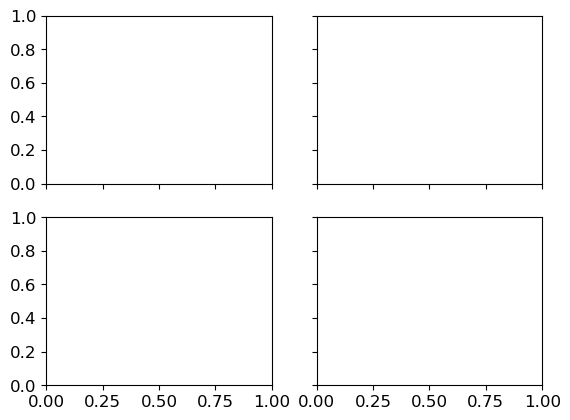

In [4]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
ax = ax.flatten()
for k in range(4):
    mchain = h5py.File('aff_inv/'+model[k]+'_all','r')['markov_chain_0']
    mmax = np.array(mchain['data']['M_max'])
    nrows = len(mmax)

    #r = [None] * 100  # Initialize r as a list to hold arrays
    #for i in range(100):
    #  r[i] = np.array(mchain['data']['R_'+str(i)])
    #  r[i] = r[i][np.nonzero(r[i])].tolist() 
    #  if r[i]==[]:
    #    r[i] = 0
    #  else:
    #    r[i] = np.mean(r[i])
    #r = np.array(r)[np.nonzero(np.array(r))]
    #m = np.arange(0.2, 0.2+((3-0.2)/99)*len(r), ((3-0.2)/99))
    #for i in range(len(m)):
    #   if m[i] > mmax:
    #      m[i] = 0
    #      r[i] = 0
    #r = r[np.nonzero(r)]
    #m = m[np.nonzero(m)]
    
    #r68, r95 = [], []
    for j in range(nrows):
        m = np.linspace(0.2, 3, 100)
        m = m[m <= mmax[j]]
        for i in range(len(m)):
            r = np.array(mchain['data']['R_'+str(i)])
            r = r[np.nonzero(r)]
            r68 = np.percentile(r, 68)
            r95 = np.percentile(r, 95)
            print(m[i], r68, r95)
            #ax[k].scatter(m[i], r68)
            #ax[k].scatter(m[i], r95)
        #sns.kdeplot(x=r, y=np.full(len(r), m[j]), ax=ax[k], fill=False, \
        #            levels=[0.68, 0.95], colors=['blue', 'red'])


    #sns.kdeplot(x=r, y=m, ax=ax[k], fill=False, levels=[0.68, 0.95], \
    #            colors=['blue', 'red'])
    #ax[k].plot(r, m)
    
    ax[k].text(0.05, 0.95, label[k], transform=ax[k].transAxes, \
                   verticalalignment='top')
    #ax[k].set_xlim(11.5, 13)
    ax[k].set_ylim(0, 2.3)
    ax[k].minorticks_on()
    ax[k].tick_params('both', length=10, width=1, which='major')
    ax[k].tick_params('both', length=5,  width=1, which='minor')

#ax[1].legend()
fig.text(0.52, 0.02, r'$R~[\mathrm{km}]$', ha='center', va='center')
fig.text(0.015, 0.51, r'$M~[M_\odot]$', ha='center', va='center', \
         rotation='vertical')
fig.tight_layout()
plt.show()